# Linear regression model - Batch Gradient Descent
## happiness = f(GDP-per-capita) - by my code and by tool

In [19]:
import matplotlib.pyplot as plt
import sklearn.metrics
import sklearn.linear_model
from BGD import BGD, utils

#### 1. Load data and verify liniarity

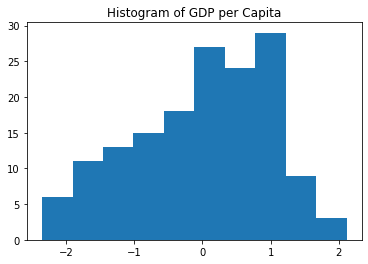

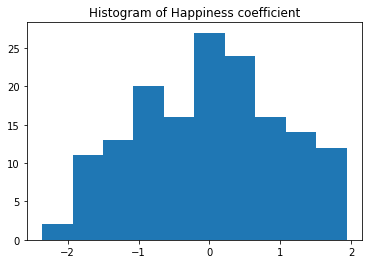

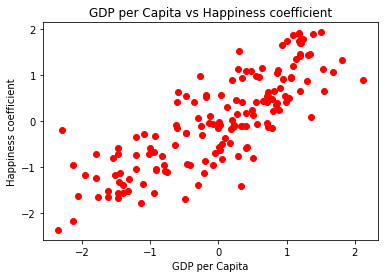

In [20]:
inputs = [
    utils.statistical_normalisation(utils.get_data('data/world-happiness-report-2017.csv', 'Economy.GDP.per.Capita'))]
outputs = utils.get_data('data/world-happiness-report-2017.csv', 'Happiness.Score')
outputs = utils.statistical_normalisation(outputs)

utils.plot_data_histograms(inputs[0], 'GDP per Capita')
utils.plot_data_histograms(outputs, 'Happiness coefficient')

plt.plot(inputs[0], outputs, 'ro')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness coefficient')
plt.title('GDP per Capita vs Happiness coefficient')
plt.show()

#### 2. Split data into training and validation subsets

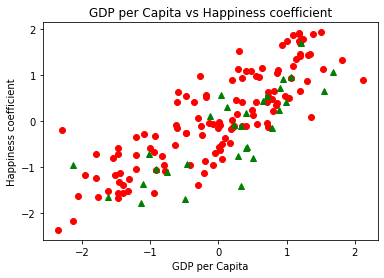

In [21]:
train_inputs, train_outputs, validation_inputs, validation_outputs = utils.split_data_into_training_and_validation(inputs, outputs, 0.8)

plt.plot(train_inputs[0], train_outputs, 'ro', label='training data')
plt.plot(validation_inputs[0], validation_outputs, 'g^', label='training data')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness coefficient')
plt.title('GDP per Capita vs Happiness coefficient')
plt.show()

#### 3. Init and train a linear regression model

In [22]:
X = [[el] for el in train_inputs[0]]

regressor = BGD.MyBGDRegressor()
regressor.fit(X, train_outputs, learning_rate=0.01, no_epochs=1000)
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('The learnt model - my code:')
print('f(x1) = ', w0, '+', w1, '* x1')

regressor_by_tool = sklearn.linear_model.SGDRegressor(alpha=0.004, max_iter=1000)
regressor_by_tool.fit(X, train_outputs)
w0, w1 = regressor_by_tool.intercept_[0], regressor_by_tool.coef_[0]
print('The learnt model - by tool:')
print('f(x1) = ', w0, '+', w1, '* x1')

The learnt model - my code:
f(x1) =  0.053866960999961425 + -0.0020548099814654943 * x1
The learnt model - by tool:
f(x1) =  0.0802473869210174 + 0.8109538397968983 * x1


#### 4. Use the learnt model to predict new inputs

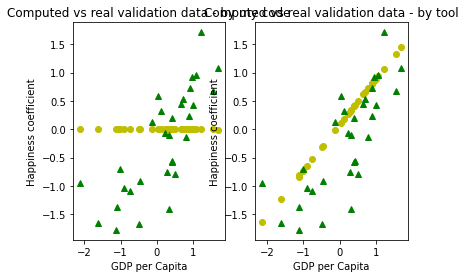

In [23]:
computed_validation_outputs_my_code = regressor.predict([[el] for el in validation_inputs[0]])
computed_validation_outputs_tool = regressor_by_tool.predict([[el] for el in validation_inputs[0]])

plt.subplot(1, 2, 1)
plt.plot(validation_inputs[0], computed_validation_outputs_my_code, 'yo', label='computed validation data')
plt.plot(validation_inputs[0], validation_outputs, 'g^', label='real validation data')
plt.title('Computed vs real validation data - by my code')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness coefficient')

plt.subplot(1, 2, 2)
plt.plot(validation_inputs[0], computed_validation_outputs_tool, 'yo', label='computed validation data')
plt.plot(validation_inputs[0], validation_outputs, 'g^', label='real validation data')
plt.title('Computed vs real validation data - by tool')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness coefficient')

plt.show()

#### 5. Performance evaluation

In [24]:
mae = sklearn.metrics.mean_absolute_error(validation_outputs, computed_validation_outputs_my_code)
rmse = sklearn.metrics.mean_squared_error(validation_outputs, computed_validation_outputs_my_code)
print('Prediction error - regression by my code')
print('mean absolute error:', mae)
print('root mean squared error:', rmse)

mae = sklearn.metrics.mean_absolute_error(validation_outputs, computed_validation_outputs_tool)
rmse = sklearn.metrics.mean_squared_error(validation_outputs, computed_validation_outputs_tool)
print('Prediction error - regression by tool')
print('mean absolute error:', mae)
print('root mean squared error:', rmse)

Prediction error - regression by my code
mean absolute error: 0.7931768698588363
root mean squared error: 0.8751235004602522
Prediction error - regression by tool
mean absolute error: 0.5631605251423711
root mean squared error: 0.4946697511503052
